## Project Description

The analytical department at Yandex.Afisha wants help from an analyst to help optimise marketing expenses

Given : 
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

Task: find 
- How people use product
- When they start to buy
- How much money each customer brings
- When they pay off


### Data Description

The visits table (server logs with data on website visits):
1. Uid — user's unique identifier
2. Device — user's device
3. Start Ts — session start date and time
4. End Ts — session end date and time
5. Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):
1. Uid — unique identifier of the user making an order
2. Buy Ts — order date and time
3. Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
1. source_id — ad source identifier
2. dt — date
3. costs — expenses on this ad source on this day


## Importing libraries & loading files

In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

In [2]:
#loading visits data
visits = pd.read_csv('visits_log_us.csv')

#loading orders data
orders = pd.read_csv('orders_log_us.csv')

#loading costs data
costs = pd.read_csv('costs_us.csv')

In [3]:
# modify column names & print first few rows of visits
visits.columns = ['device','end_ts','source_id','start_ts','uid']
visits.head(3)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [4]:
# modify column names & print first few rows of orders
orders.columns = ['buy_ts','revenue','uid']
orders.head(3)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [5]:
# modify column names & print first few rows of costs
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


### Data insepecting for optimization

#### visits

In [6]:
#insepcting visits

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [7]:
#checking categories in device
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [8]:
#optimizing visits


#Change device column type to category
visits['device'] = visits['device'].astype('category')

#change end_ts & start_ts colum type to datetime 
visits[['end_ts','start_ts']] = visits[['end_ts','start_ts']].apply(pd.to_datetime)

#check for memory usage
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


#### orders

In [9]:
#insepcting orders

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [10]:
#optimizing orders


#change buy_ts colum type to datetime 
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

#check for memory usage
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### costs

In [11]:
#insepcting costs

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [12]:
#optimizing costs


#change dt colum type to datetime 
costs['dt'] = pd.to_datetime(costs['dt'])

#check for memory usage
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


> <b> conclusion: </b>  <br>
> <ul>
    <li> In visits table, device column type was changed to category and start and end timestamp was changed to datetime type. This reduced the meory usage considerably from 79 to 11 MB </li>
    <li> In orders table, only buy timestamp column's type was chnaged to datetime and the memory usage reduced to 1 MB from 4 MB</li>
    <li>The date column's type was changed to datetime whoch reduced the memory usage from 206 to 59 KB</li>
    

In [13]:
#checking duplicates

[visits.duplicated().sum(), visits.isna().sum()]

[0,
 device       0
 end_ts       0
 source_id    0
 start_ts     0
 uid          0
 dtype: int64]

In [14]:
[orders.duplicated().sum(), orders.isna().sum()]

[0,
 buy_ts     0
 revenue    0
 uid        0
 dtype: int64]

In [15]:
[costs.duplicated().sum(), costs.isna().sum()]

[0,
 source_id    0
 dt           0
 costs        0
 dtype: int64]

> No missing values or duplicates found - **DATA CLEAN** 

## Make reports & Calculate Metrics

### Product

#### Number of usage per week, month and year

In [16]:
# retrieve week 
visits['week'] = visits['start_ts'].dt.week

#retrieve month
visits['month'] = visits['start_ts'].dt.month

#retrieve year
visits['year'] = visits['start_ts'].dt.year

#retrive only date
visits['date'] = visits['start_ts'].dt.date

#print head
visits.head(3)

<ipython-input-16-652a205072cc>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['week'] = visits['start_ts'].dt.week


,device,end_ts,source_id,start_ts,uid,week,month,year,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01



Daily usage Average : 907




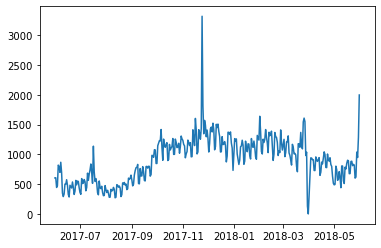

In [17]:
#Daily usage  count

daily = visits.groupby('date').agg({'uid':'nunique'}).reset_index()

#plotting daily usage count
plt.plot(daily['date'],daily['uid'])

print()
#daily usage average 

daily_avg = daily['uid'].mean()
print(f'Daily usage Average : {int(daily_avg)}')
print()
print()

> **Insights:**
> <ul>
    <li>There is a peak on one of the day in the month of November. This could be due to some special offers/ Discounts on that particular day </li>
    <li>There is also a sharp drop at the end of march. This could be due to some technical issues with the website </li>


Weekly usage average: 5825




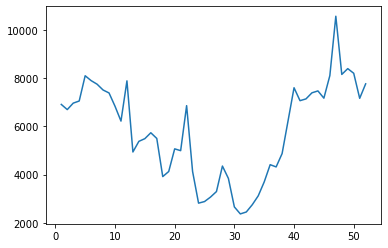

In [18]:
# weekly usage count
weekly = visits.groupby('week').agg({'uid':'nunique'}).reset_index() 

#plotting daily usage count
plt.plot(weekly['week'],weekly['uid'])

print()

#weekly average usage
weekly_avg = weekly['uid'].mean()
print(f'Weekly usage average: {int(weekly_avg)}')
print()
print()

>**Insights:**
> <ul>
    <li>There is a slow drop in the number of usage after several weeks. This could be because of some low marketing as time passes by. A following increase explains a probable increase in marketing due to a drop </li>


monthly usage : 23228




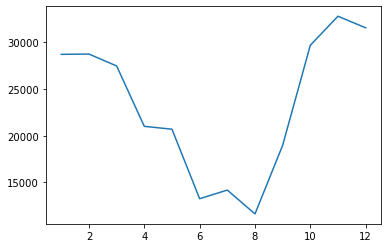

In [19]:
# monthly usage  count

monthly = visits.groupby('month').agg({'uid':'nunique'}).reset_index()

#plotting daily usage count
plt.plot(monthly['month'],monthly['uid'])

print()


monthly_avg = monthly['uid'].mean()
print(f'monthly usage : {int(monthly_avg)}')
print()
print()

In [20]:
#yearly usage  count

yearly = visits.groupby('year').agg({'uid':'nunique'}).reset_index()
yearly['year'] = yearly['year'].astype('category')

yearly_avg = yearly['uid'].mean()
print(f'Yearly usage : {int(yearly_avg)}')

Yearly usage : 122156


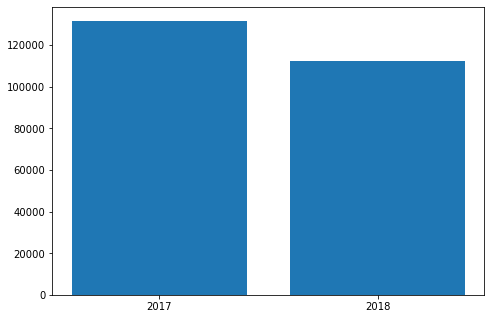

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = yearly['year']
count = yearly['uid']
ax.bar(year,count)
ax.set_xticks(yearly['year'])
plt.show()

> **Conclusion:** 
> <ul>
    <li>On an average, about 900 users use the product , so it can be said that the product is quite popular</li>
    <li>There is a slow drop after several weeks. This could be because of low marketing, or users might have got bored and require some new features or there is no push notifications.</li>
    <li>A further increase means solving the above mentioned issues</li>

#### Calculating sessions per day

In [22]:
#retrieve number of session per user per day
sessions_per_day = visits.groupby('date').agg({'uid': ['count', 'nunique']})

In [23]:
#renaming columns 
sessions_per_day.columns = ['n_sessions', 'n_users']

#divide the number of sessions by the number of users for a given period
sessions_per_day['sessions_per_day'] = (sessions_per_day['n_sessions'] / sessions_per_day['n_users'])

In [24]:
sessions_per_day = sessions_per_day.reset_index()

In [25]:
print(sessions_per_day.head()) 

         date  n_sessions  n_users  sessions_per_day
0  2017-06-01         664      605          1.097521
1  2017-06-02         658      608          1.082237
2  2017-06-03         477      445          1.071910
3  2017-06-04         510      476          1.071429
4  2017-06-05         893      820          1.089024


> **Conclusion:** <br>
> <ul>
    <li> Each user had just 1 session per day. This is not very frequent</li>
    

In [26]:
#Average session per day

sessions_per_day['sessions_per_day'].mean()

1.0821696440039723

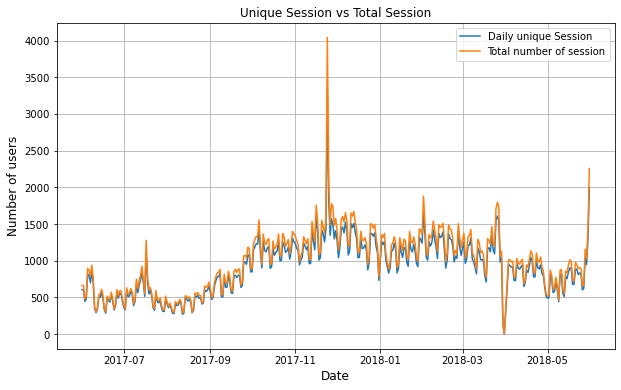

In [27]:
#comparing daily sessions to total sessions per user

plt.figure(figsize=(10,6))
plt.plot(daily['date'], daily['uid'], label='Daily unique Session')
plt.plot(sessions_per_day['date'], sessions_per_day['n_sessions'], label='Total number of session')
plt.title('Unique Session vs Total Session')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of users', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

> **Conclusion:**
> <ul> 
    <li>The daily unique usage correlates with the total daily usage. So the users make atmost 1 session per day.</li>

In [28]:
#splitting number of sessions based on the device

desktop = (visits[visits['device']=='desktop'].groupby('date').agg({'uid':['count','nunique']})).reset_index()
desktop.columns = ['date','n_sessions','n_unique_sessions']

touch = visits[visits['device']=='touch'].groupby('date').agg({'uid':['count','nunique']}).reset_index()
touch.columns = ['date','n_sessions','n_unique_sessions']


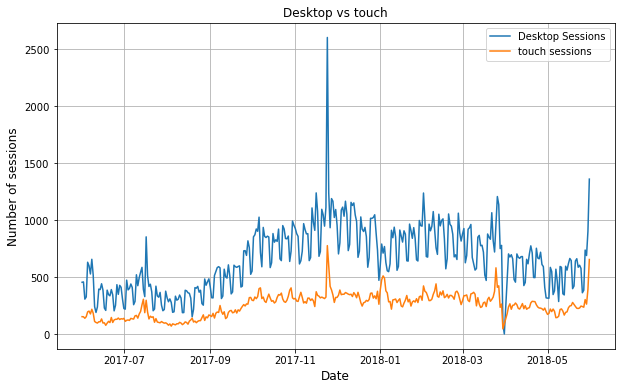

In [29]:
#plottting number of sessions for each device 

plt.figure(figsize=(10,6))
plt.plot(desktop['date'], desktop['n_unique_sessions'], label='Desktop Sessions')
plt.plot(touch['date'], touch['n_unique_sessions'], label='touch sessions')
plt.title('Desktop vs touch')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of sessions', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

> **Conclusion:**
> <ul>
    <li>Comparing the number of sessions on desktop and touch, users prefer accessing via desktop than via mobile. This could be due to different user interface and layouting on different devices and user comforts</li>

#### Finding the length of each session

In [30]:
#taking the difference between start and end timestamp to get lenght

visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

<AxesSubplot:>

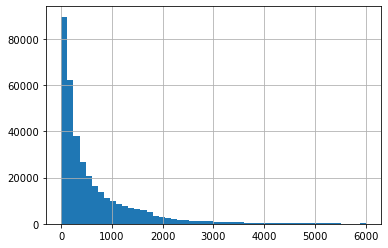

In [31]:
#check the distribution of the duration
visits['duration'].hist(bins=50, range =(0,6000)) 

In [32]:
#take the mode of the duration

int(visits['duration'].mode())

60

> **Conclusion:**
> <ul>
    <li>Since the duration is not normally distributed, mode is used to take average session length.</li>
    <li>The average session length is found to be about a min which is not very good</li>

#### How often users come back? - Retention rate

In [33]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,week,month,year,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01,0


In [34]:
#renaming column
visits = visits.rename(columns = {'date':'activity_date'})

In [35]:
#getting the first visit date
first_activity_date = visits.groupby(['uid'])['activity_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')

In [36]:
#changing the data type 

visits[['activity_date','first_activity_date']] = visits[['activity_date','first_activity_date']].apply(pd.to_datetime)

In [37]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,week,month,year,activity_date,duration,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01,0,2017-07-01


In [38]:
#adding activity month & first_activity month

visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['activity_date'].astype('datetime64[M]')

In [39]:
#forming cohorts and their lifetime in terms of month

visits['cohort_lifetime'] = ((visits['activity_month'] - visits['first_activity_month'] ) / np.timedelta64(1, 'M')).round().astype(int)

In [40]:
#group the data by cohort and lifetime and find the number of active users at a certain lifetime week for each cohort

cohorts = (visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()) 

In [41]:
#find initital number of users

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
print(initial_users_count.head(3))

   first_activity_month    uid
0            2017-06-01  13259
12           2017-07-01  13140
23           2017-08-01  10181


In [42]:
#renaming column 

initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

In [43]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

In [44]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')

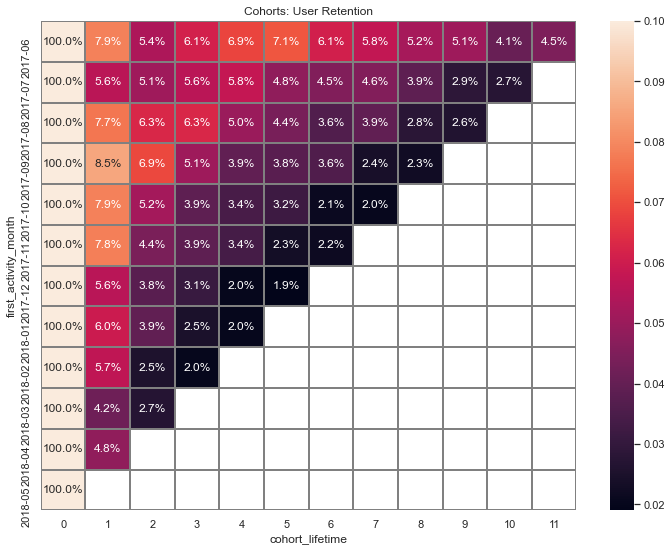

In [45]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)


sns.set(style='white')
plt.figure(figsize=(12, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.10
)
plt.show()

> **Conclusion:**
> <ul> 
    <li>The retention rate decreased for the 1st, 2nd and 3rd cohort intially and then increased again followed by a further drop</li>
    <li>The retention rate dropped steadily for all other cohorts</li>

In [46]:
#checking user's loyalty

#weekly stikcy factor

dau_total = visits.groupby('activity_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()
yau_total = visits.groupby('year').agg({'uid':'nunique'}).mean()

sticky_wau = dau_total/wau_total*100
print(f'weekly revist percentage: {str(round(float(sticky_wau),2))}%')

print()

sticky_mau = dau_total/mau_total*100
print(f'monthly revist percentage: {str(round(float(sticky_mau),2))}%')

print()

sticky_yau = (dau_total / yau_total)*100
print(f'yearly revist percentage: {str(round(float(sticky_yau),2))}%')

weekly revist percentage: 15.88%

monthly revist percentage: 3.91%

yearly revist percentage: 0.74%


> **Conclusion:**
> <ul>
    <li>percentage of revisits drop down considerably after few months and is even worse after a year</li>

### Sales

#### When people start buying ?

In [47]:
#make a df for first visit

visitors = visits[['uid','first_activity_date']]

visitors.head(3)

,uid,first_activity_date
0,16879256277535980062,2017-12-20
1,104060357244891740,2018-02-19
2,7459035603376831527,2017-07-01


In [48]:
#get the first order date from orders df

orders['order_date'] = orders['buy_ts'].dt.date


first_order_date = orders.groupby(['uid']).agg({'order_date':'min'}).reset_index()
first_order_date.columns=['uid', 'first_order_date']

orders = pd.merge(orders,first_order_date, on = 'uid')

orders.head(3)


,buy_ts,revenue,uid,order_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01


In [49]:
#make a df consisting of only uid and first order date

buyer = orders[['uid','first_order_date']]
buyer['first_order_date'] = pd.to_datetime(buyer['first_order_date'])
buyer.head(3)

<ipython-input-49-bd37e7553c70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyer['first_order_date'] = pd.to_datetime(buyer['first_order_date'])


,uid,first_order_date
0,10329302124590727494,2017-06-01
1,11627257723692907447,2017-06-01
2,17903680561304213844,2017-06-01


In [50]:
#merge visitor and buyer df

conversion = pd.merge(visitors,buyer, on ='uid')

conversion.head(3)

,uid,first_activity_date,first_order_date
0,16174680259334210214,2018-03-09,2018-03-09
1,16174680259334210214,2018-03-09,2018-03-09
2,16007536194108375387,2017-09-03,2017-09-04


In [51]:
conversion.shape

(761807, 3)

In [52]:
#droppig dupicates

conversion = conversion.drop_duplicates()
conversion.shape

(36523, 3)

In [53]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 761806
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_activity_date  36523 non-null  datetime64[ns]
 2   first_order_date     36523 non-null  datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


In [54]:
#check if there are any rows where first_order date is < first_visit date

conversion[conversion['first_order_date'] < conversion['first_activity_date']]

,uid,first_activity_date,first_order_date


In [55]:
#add timespan column for difference between the first visit and placing an order

conversion['diff_days'] = (conversion['first_order_date'] - conversion['first_activity_date']) / np.timedelta64(1,'D')

conversion.head(10)

,uid,first_activity_date,first_order_date,diff_days
0,16174680259334210214,2018-03-09,2018-03-09,0.0
2,16007536194108375387,2017-09-03,2017-09-04,1.0
35,8056418121947262981,2017-06-04,2017-06-25,21.0
9982,18188358787673499603,2018-02-10,2018-02-12,2.0
9988,2307401184189569202,2017-09-23,2017-09-27,4.0
9992,4499746016005494365,2017-10-23,2017-11-16,24.0
10052,15857957287537270437,2017-09-22,2018-03-12,171.0
10058,15763368622958393183,2017-11-06,2018-03-06,120.0
10063,15868686231870595097,2018-03-27,2018-03-27,0.0
10067,9419370217043167984,2017-09-14,2017-10-03,19.0


In [56]:
def category(row):
    diff = row['diff_days']
    
    if diff == 0:
        return 'same day'
    elif diff <=7:
        return 'within a week'
    elif diff <=14:
        return 'within 2 weeks'
    elif diff <=30:
        return 'within a month'
    else:
        return 'more than a month'

In [57]:
conversion['category'] = conversion.apply(category, axis=1)

conversion.head(3)

,uid,first_activity_date,first_order_date,diff_days,category
0,16174680259334210214,2018-03-09,2018-03-09,0.0,same day
2,16007536194108375387,2017-09-03,2017-09-04,1.0,within a week
35,8056418121947262981,2017-06-04,2017-06-25,21.0,within a month


In [58]:
conversion_group = conversion.groupby('category').agg({'uid':'count'}).reset_index()
conversion_group.columns = ['category','count']
conversion_group['percentage'] = ((conversion_group['count'] / conversion_group['count'].sum()) *100).round(2)
conversion_group


,category,count,percentage
0,more than a month,4934,13.51
1,same day,25039,68.56
2,within 2 weeks,974,2.67
3,within a month,1279,3.50
4,within a week,4297,11.77


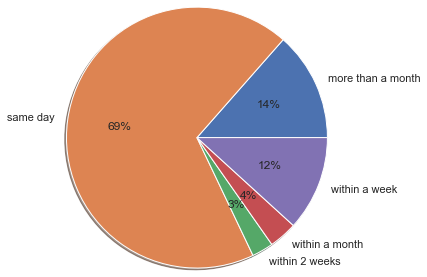

In [59]:
plt.pie(conversion_group['count'], labels = conversion_group['category'], shadow = True, radius=1.5,autopct='%1.0f%%')
plt.show()

> **conclusion:**
> <ul>
    <li>The pie chart reveals that most of the customer make a purchase on the first visit</li>
    <li>Some users make pucrahses within week and rarely take longer than 2 weeks </li>
    <li>Some users have made purchases after a month, this could be because the product they looked for wasnt available initally</li>

#### Number of orders at a given period of time 

In [60]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            50415 non-null  datetime64[ns]
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   order_date        50415 non-null  object        
 4   first_order_date  50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2), uint64(1)
memory usage: 2.3+ MB


In [61]:
orders['order_month'] = orders['buy_ts'].dt.date

In [62]:
#retrieving first_order month for each customer
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['order_month'].astype('datetime64[M]')


print(orders[['uid','first_order_month']].head(5))

                    uid first_order_month
0  10329302124590727494        2017-06-01
1  11627257723692907447        2017-06-01
2  17903680561304213844        2017-06-01
3  16109239769442553005        2017-06-01
4  14200605875248379450        2017-06-01


In [63]:
#orders count gropued by month
orders_count = orders.groupby('first_order_month').agg({'uid':['count','nunique']}).reset_index()
orders_count.columns = ['first_order_month','count','nunique']

orders_count

,first_order_month,count,nunique
0,2017-06-01,4438,2023
1,2017-07-01,2910,1923
2,2017-08-01,2188,1370
3,2017-09-01,3878,2581
4,2017-10-01,6005,4340
5,2017-11-01,5900,4081
6,2017-12-01,5894,4383
7,2018-01-01,4308,3373
8,2018-02-01,4470,3651
9,2018-03-01,4484,3533


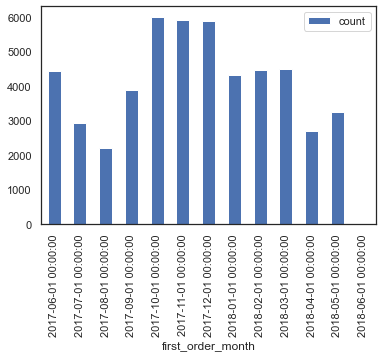

In [64]:
#plot number of orders for each cohort

orders_count.plot(x='first_order_month', y='count',kind="bar")
plt.show()

> **Conclusion:**
> <ul> 
    <li>It can be seen from the graph that people usually start buying more towards the end of the year starting from october.</li>
    <li>The reason could be because of the number of special occasions at the end of the year</li>

In [65]:
#pivot table for number of orders of each cohort over time
orders_pivot = orders.pivot_table(index = 'first_order_month', columns = 'order_month', values = 'uid', aggfunc = 'count')


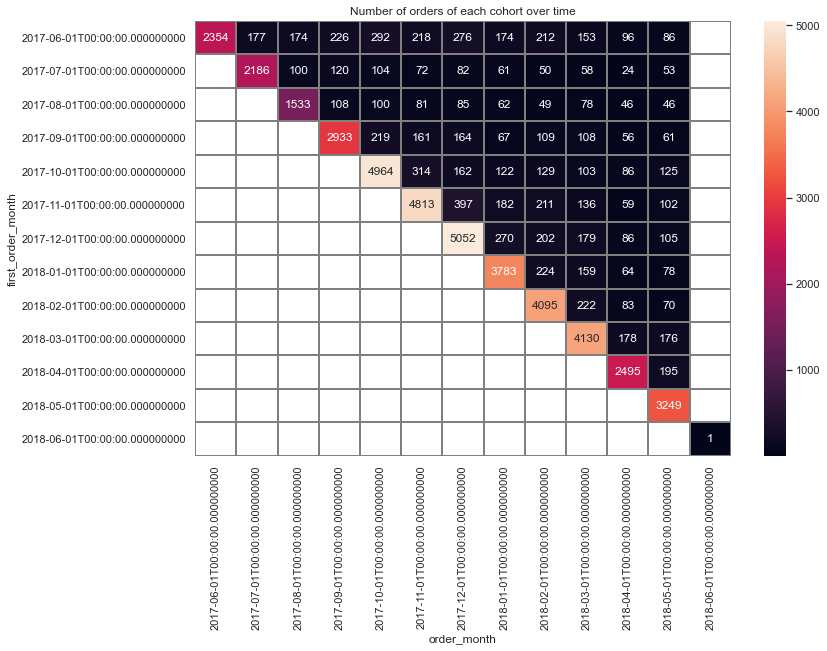

In [66]:
#heatmap number of orders of each cohort over time

plt.figure(figsize=(12,8))
plt.title('Number of orders of each cohort over time')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

> **Conclusion:**
> <ul>
    <li>The number of orders placed by the Dec-2017 increases the most compared to other cohorts</li>

In [67]:
orders.head(3)

,buy_ts,revenue,uid,order_date,first_order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [68]:
# number of orders per day

orders_per_day = orders.groupby('order_date').agg({'uid':'count'}).reset_index()
orders_per_day.columns = ['order_date','count']

orders_per_day.head(3)

,order_date,count
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67


In [69]:
#number of orders per week

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['order_week'] = pd.to_datetime(orders['order_date'], unit='d') - pd.to_timedelta(orders['order_date'].dt.dayofweek, unit='d')

orders_per_week = orders.groupby('order_week').agg({'uid':'count'}).reset_index()
orders_per_week.columns = ['order_week','count']
orders_per_week.head(3)

,order_week,count
0,2017-05-29,340
1,2017-06-05,938
2,2017-06-12,343


In [70]:
#orders per month
orders_per_month = orders_count[['first_order_month','count']]
orders_per_month.head(3)

,first_order_month,count
0,2017-06-01,4438
1,2017-07-01,2910
2,2017-08-01,2188


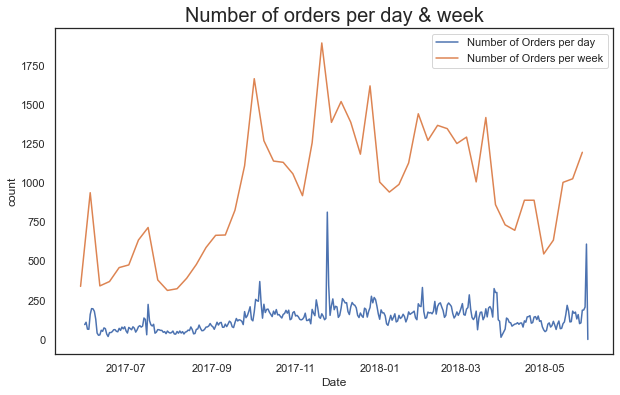

In [71]:
plt.figure(figsize = (10,6))
plt.plot(orders_per_day['order_date'], orders_per_day['count'], label = 'Number of Orders per day')
plt.plot(orders_per_week['order_week'], orders_per_week['count'], label = 'Number of Orders per week')
plt.title('Number of orders per day & week', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend()
plt.show()

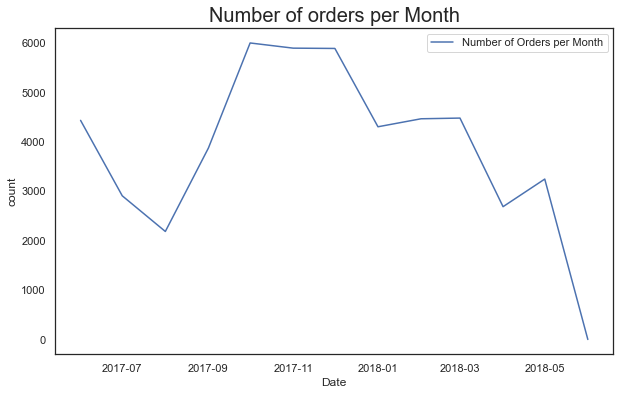

In [72]:
plt.figure(figsize = (10,6))
plt.plot(orders_per_month['first_order_month'], orders_per_month['count'], label = 'Number of Orders per Month')
plt.title('Number of orders per Month', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend()
plt.show()

#### Average purchase size

In [73]:
#grouping cohorts to sum revenue and count order

orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': ['sum','mean'], 'uid': 'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_order_month','order_month','total_revenue','average_revenue','count']
print(orders_grouped_by_cohorts.head()) 

  first_order_month order_month  total_revenue  average_revenue  count
0        2017-06-01  2017-06-01        9557.49         4.060106   2023
1        2017-06-01  2017-07-01         981.82         5.547006     61
2        2017-06-01  2017-08-01         885.34         5.088161     50
3        2017-06-01  2017-09-01        1931.30         8.545575     54
4        2017-06-01  2017-10-01        2068.58         7.084178     88


In [74]:
#adding cohort lifetime column

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = ((orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month'])/ np.timedelta64(1, 'M')).round().astype('int')


orders_grouped_by_cohorts.head()

,index,first_order_month,order_month,total_revenue,average_revenue,count,cohort_lifetime
0,0,2017-06-01,2017-06-01,9557.49,4.060106,2023,0
1,1,2017-06-01,2017-07-01,981.82,5.547006,61,1
2,2,2017-06-01,2017-08-01,885.34,5.088161,50,2
3,3,2017-06-01,2017-09-01,1931.30,8.545575,54,3
4,4,2017-06-01,2017-10-01,2068.58,7.084178,88,4


<AxesSubplot:title={'center':'total customer purchase '}, xlabel='cohort_lifetime', ylabel='first_order_month'>

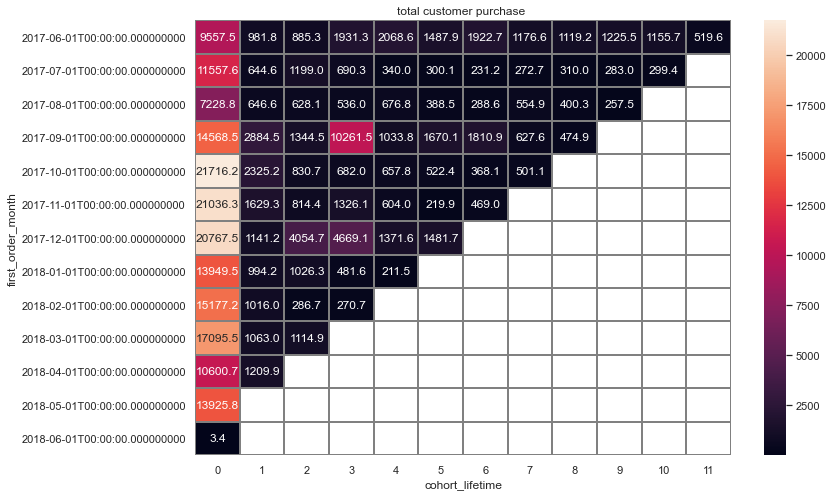

In [75]:
#calculating total purchase

revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='total_revenue',
)

#plotting total purchase over time
plt.figure(figsize=(12, 8))
plt.title('total customer purchase ')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

<AxesSubplot:title={'center':'Average customer purchase size'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

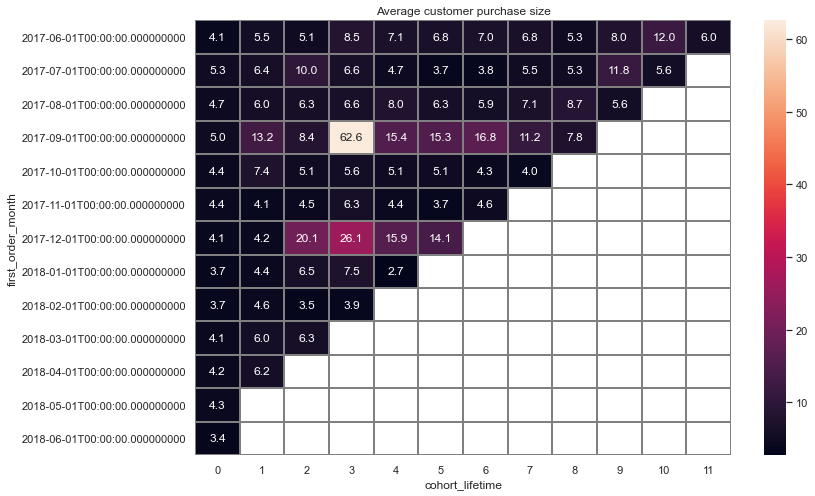

In [76]:
#calculating average purchase size

revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='average_revenue',
)

#plotting total purchase over time
plt.figure(figsize=(12, 8))
plt.title('Average customer purchase size')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

> **Conclusion:**
> <ul> 
    <li>The average purchase size for sept-2017 starts with the highest value and futher increases in 3rd lifetime</li>

In [77]:
orders.head(3)

,buy_ts,revenue,uid,order_date,first_order_date,order_month,first_order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29


In [78]:
#total Average revenue 

(orders['revenue'].sum() / orders['uid'].count()).round()

5.0

In [79]:
#Average revenue per day

revenue_per_day = orders.groupby('order_date').agg({'revenue':['sum','mean']}).reset_index()
revenue_per_day.columns = ['order_date','revenue','average']
#revenue_per_day['average'] = revenue_per_day['revenue'] / revenue_per_day['count']
revenue_per_day.head(3)

,order_date,revenue,average
0,2017-06-01,389.46,4.056875
1,2017-06-02,324.11,2.919910
2,2017-06-03,166.48,2.484776


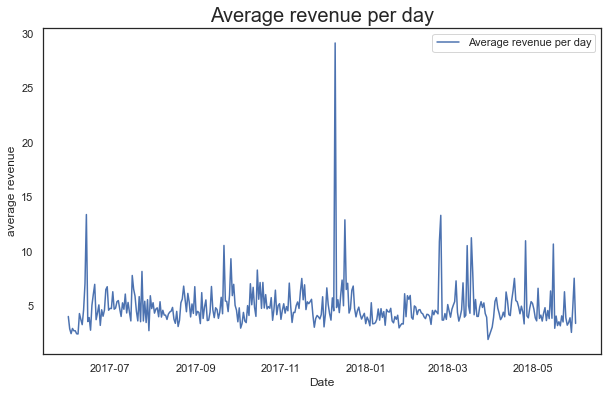

In [80]:
plt.figure(figsize = (10,6))
plt.plot(revenue_per_day['order_date'], revenue_per_day['average'], label = 'Average revenue per day')
plt.title('Average revenue per day', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('average revenue', fontsize=12)
plt.legend()
plt.show()

In [81]:
#Average revenue per week

revenue_per_week = orders.groupby('order_week').agg({'revenue':['sum','mean']}).reset_index()
revenue_per_week.columns = ['order_week','revenue','average']
#revenue_per_week['average'] = revenue_per_week['revenue'] / revenue_per_week['count']
revenue_per_week.head(3)

,order_week,revenue,average
0,2017-05-29,1075.26,3.162529
1,2017-06-05,2733.58,2.914264
2,2017-06-12,2020.39,5.890350


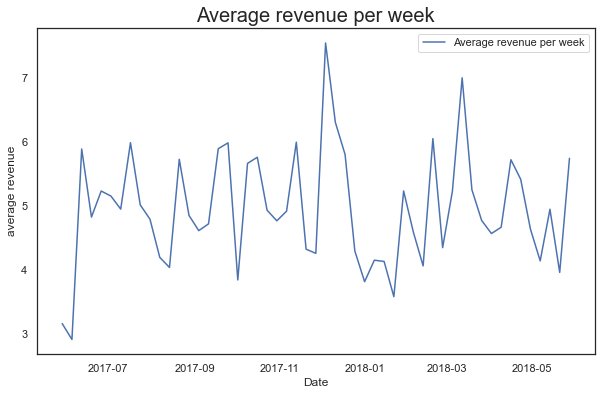

In [82]:
plt.figure(figsize = (10,6))
plt.plot(revenue_per_week['order_week'], revenue_per_week['average'], label = 'Average revenue per week')
plt.title('Average revenue per week', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('average revenue', fontsize=12)
plt.legend()
plt.show()

In [83]:
orders.head(3)

,buy_ts,revenue,uid,order_date,first_order_date,order_month,first_order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29


In [84]:
revenue_per_month = orders.groupby('first_order_month').agg({'revenue':['sum','mean']}).reset_index()
revenue_per_month.columns = ['first_order_month','revenue','average']
#revenue_per_month['average'] = revenue_per_month['revenue'] / revenue_per_month['count']
revenue_per_month.head(3)

,first_order_month,revenue,average
0,2017-06-01,24031.69,5.414982
1,2017-07-01,16127.92,5.542241
2,2017-08-01,11606.26,5.304506


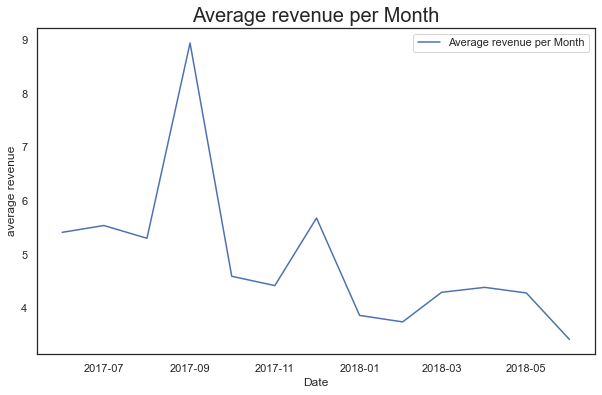

In [85]:
plt.figure(figsize = (10,6))
plt.plot(revenue_per_month['first_order_month'], revenue_per_month['average'], label = 'Average revenue per Month')
plt.title('Average revenue per Month', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('average revenue', fontsize=12)
plt.legend()
plt.show()

#### Lifetime Value

In [86]:
# getting the cohort size

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [87]:
#getting revenue per month

cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [88]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [89]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


<AxesSubplot:title={'center':'Lifetime Value'}, xlabel='age', ylabel='first_order_month'>

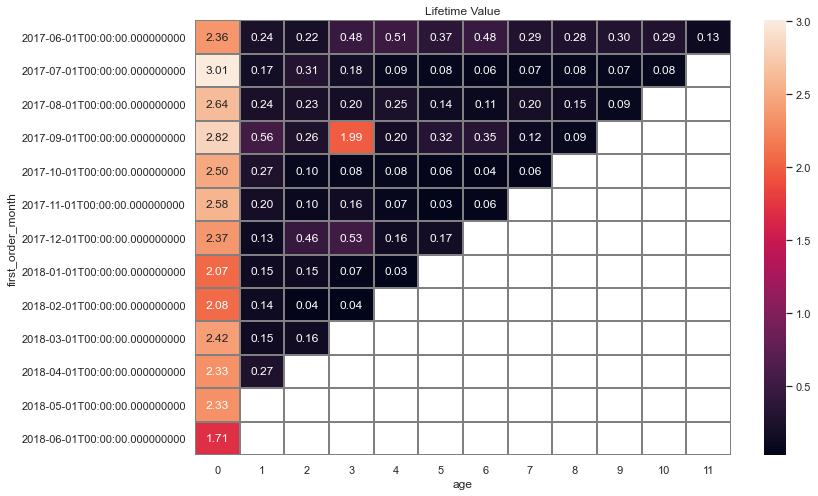

In [90]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('')

plt.figure(figsize=(12, 8))
plt.title('Lifetime Value')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 

<AxesSubplot:title={'center':'Lifetime Value'}, xlabel='age', ylabel='first_order_month'>

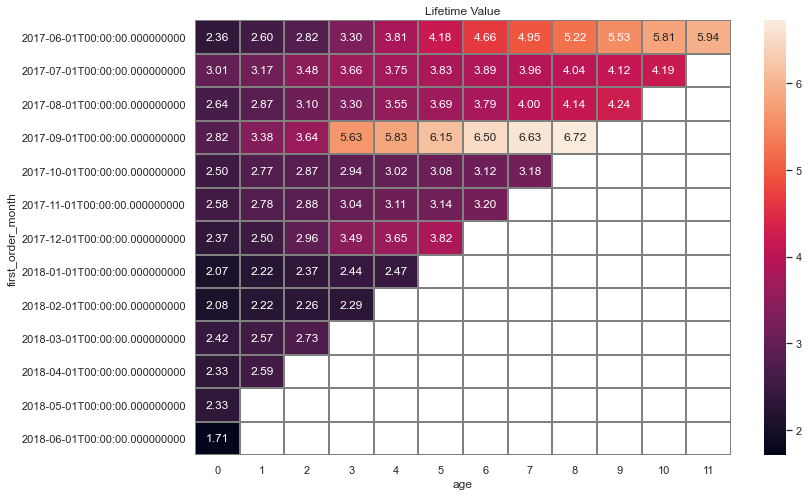

In [91]:
#Cumulative LTV for each cohort
cum_ltv = output.cumsum(axis=1).round(2)
cum_ltv.fillna(' ')

plt.figure(figsize=(12, 8))
plt.title('Lifetime Value')
sns.heatmap(
    cum_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 

> **Conclusion:**
> <ul>
    <li>The LTV for sept-2017 cohort is better compared to other cohorts</li>

In [92]:
#LTV per source

user_source = visits.groupby(['uid','source_id'])['uid'].count()
user_source.name = 'n_users'
user_source = user_source.reset_index()
user_source.head(3)

,uid,source_id,n_users
0,11863502262781,3,1
1,49537067089222,2,1
2,297729379853735,3,1


In [93]:
#merging source details with orders dataframe
orders = orders.merge(user_source, on='uid')
orders.head(3)

,buy_ts,revenue,uid,order_date,first_order_date,order_month,first_order_month,order_week,source_id,n_users
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29,1,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29,2,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-05-29,2,1


In [94]:
#forming cohort based on source id

cohort_size_source = orders.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_size_source.rename(columns = {'uid':'n_buyers'}, inplace=True)
cohort_size_source.head(3)

,first_order_month,source_id,n_buyers
0,2017-06-01,1,401
1,2017-06-01,2,457
2,2017-06-01,3,874


In [95]:
cohorts_source = orders.groupby(['first_order_month','order_month','source_id']).agg({'revenue':'sum','uid':'nunique'})
cohorts_source = cohorts_source.reset_index()

In [96]:
cohorts_source['cohort_lifetime'] = (cohorts_source['order_month'] - cohorts_source['first_order_month']) / np.timedelta64(1,'M')
cohorts_source['cohort_lifetime'] = cohorts_source['cohort_lifetime'].round().astype('int')
cohorts_source.head(3)

,first_order_month,order_month,source_id,revenue,uid,cohort_lifetime
0,2017-06-01,2017-06-01,1,2563.84,401,0
1,2017-06-01,2017-06-01,2,3161.11,457,0
2,2017-06-01,2017-06-01,3,4165.12,874,0


In [97]:
#report per source

report_per_source = pd.merge(cohort_size_source, cohorts_source, on=['first_order_month','source_id'])
report_per_source.head(3)

,first_order_month,source_id,n_buyers,order_month,revenue,uid,cohort_lifetime
0,2017-06-01,1,401,2017-06-01,2563.84,401,0
1,2017-06-01,1,401,2017-07-01,881.60,37,1
2,2017-06-01,1,401,2017-08-01,755.03,32,2


In [98]:
margin_rate = 0.5
report_per_source['gp'] = report_per_source['revenue']*margin_rate
report_per_source.head()

report_per_source['ltv'] = report_per_source['gp'] / report_per_source['n_buyers']
report_per_source['first_order_month_str'] = report_per_source['first_order_month'].dt.strftime('%Y-%m')

report_per_source.head(3)

,first_order_month,source_id,n_buyers,order_month,revenue,uid,cohort_lifetime,gp,ltv,first_order_month_str
0,2017-06-01,1,401,2017-06-01,2563.84,401,0,1281.920,3.196808,2017-06
1,2017-06-01,1,401,2017-07-01,881.60,37,1,440.800,1.099252,2017-06
2,2017-06-01,1,401,2017-08-01,755.03,32,2,377.515,0.941434,2017-06


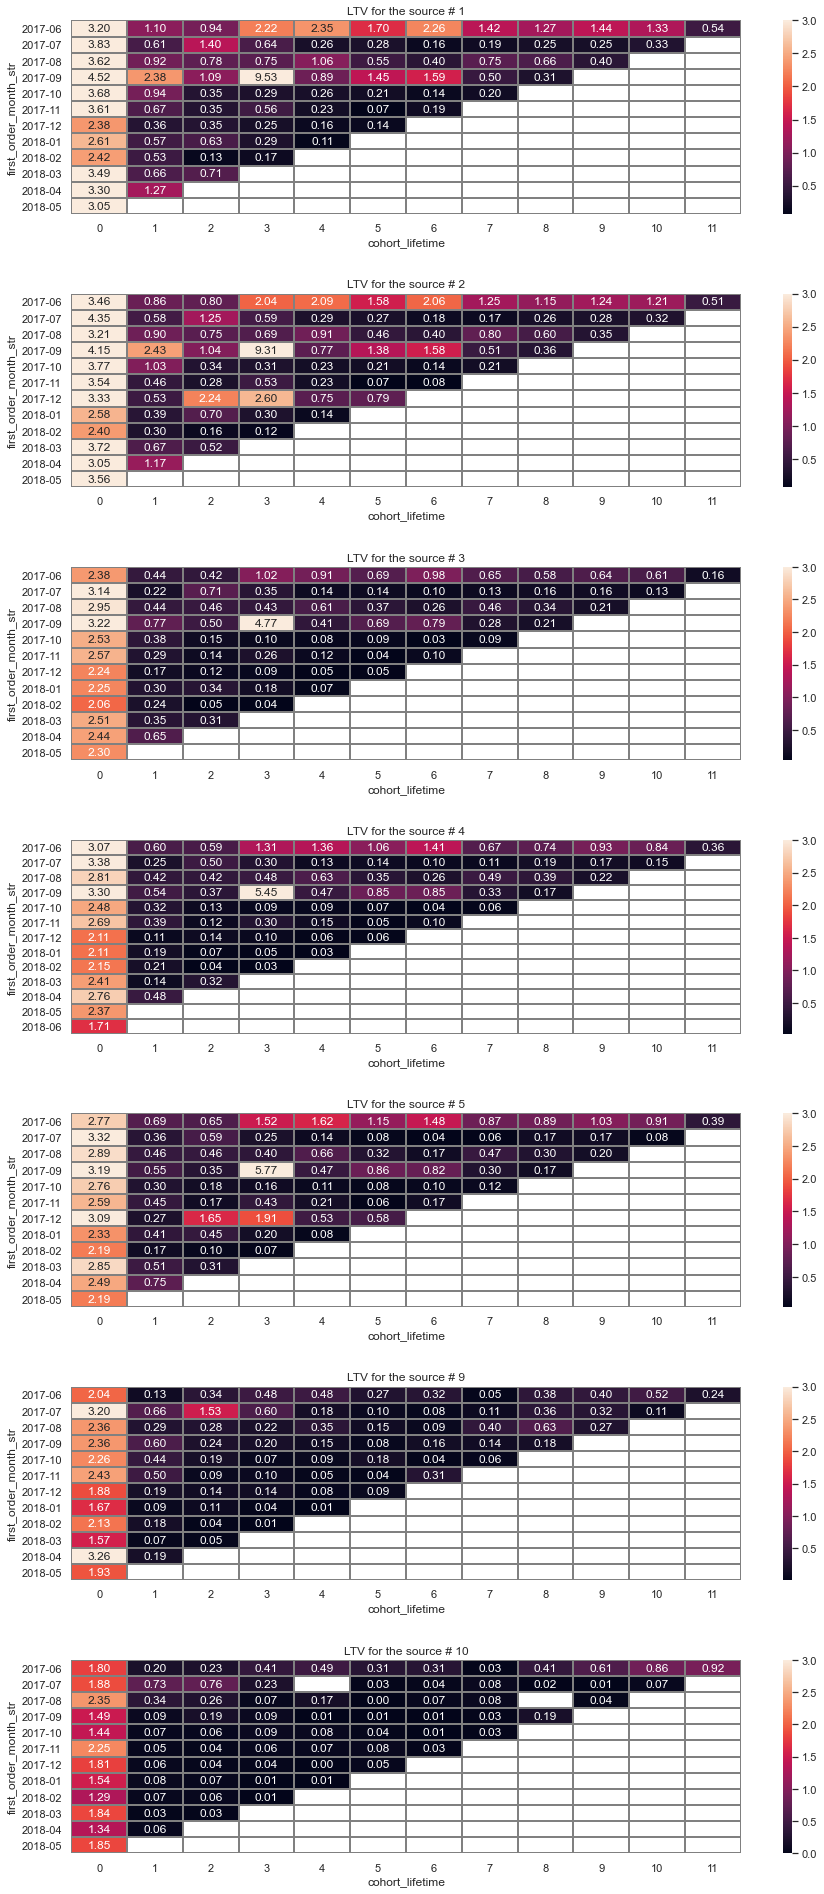

In [99]:
sources = visits['source_id'].unique()
sources.sort()


# heatmap for ltv per source 
fig = plt.figure(figsize=(15, 40))
plt.title("LTV for different sources")
i=0
for source in sources:
    if source == 6 or source == 7:
        continue
    source_output = report_per_source.query('source_id == @source').pivot_table(index='first_order_month_str',columns='cohort_lifetime', values='ltv', aggfunc='mean').round(2)
          
    ax1 = plt.subplot2grid((32, 12), (4*i, 0), colspan=12, rowspan=3)
    ax1.set_title("LTV for the source # " + str(source), fontsize=12)    
    
    sns.heatmap(source_output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', ax=ax1, vmax=3)
    i = i+1      
plt.show()

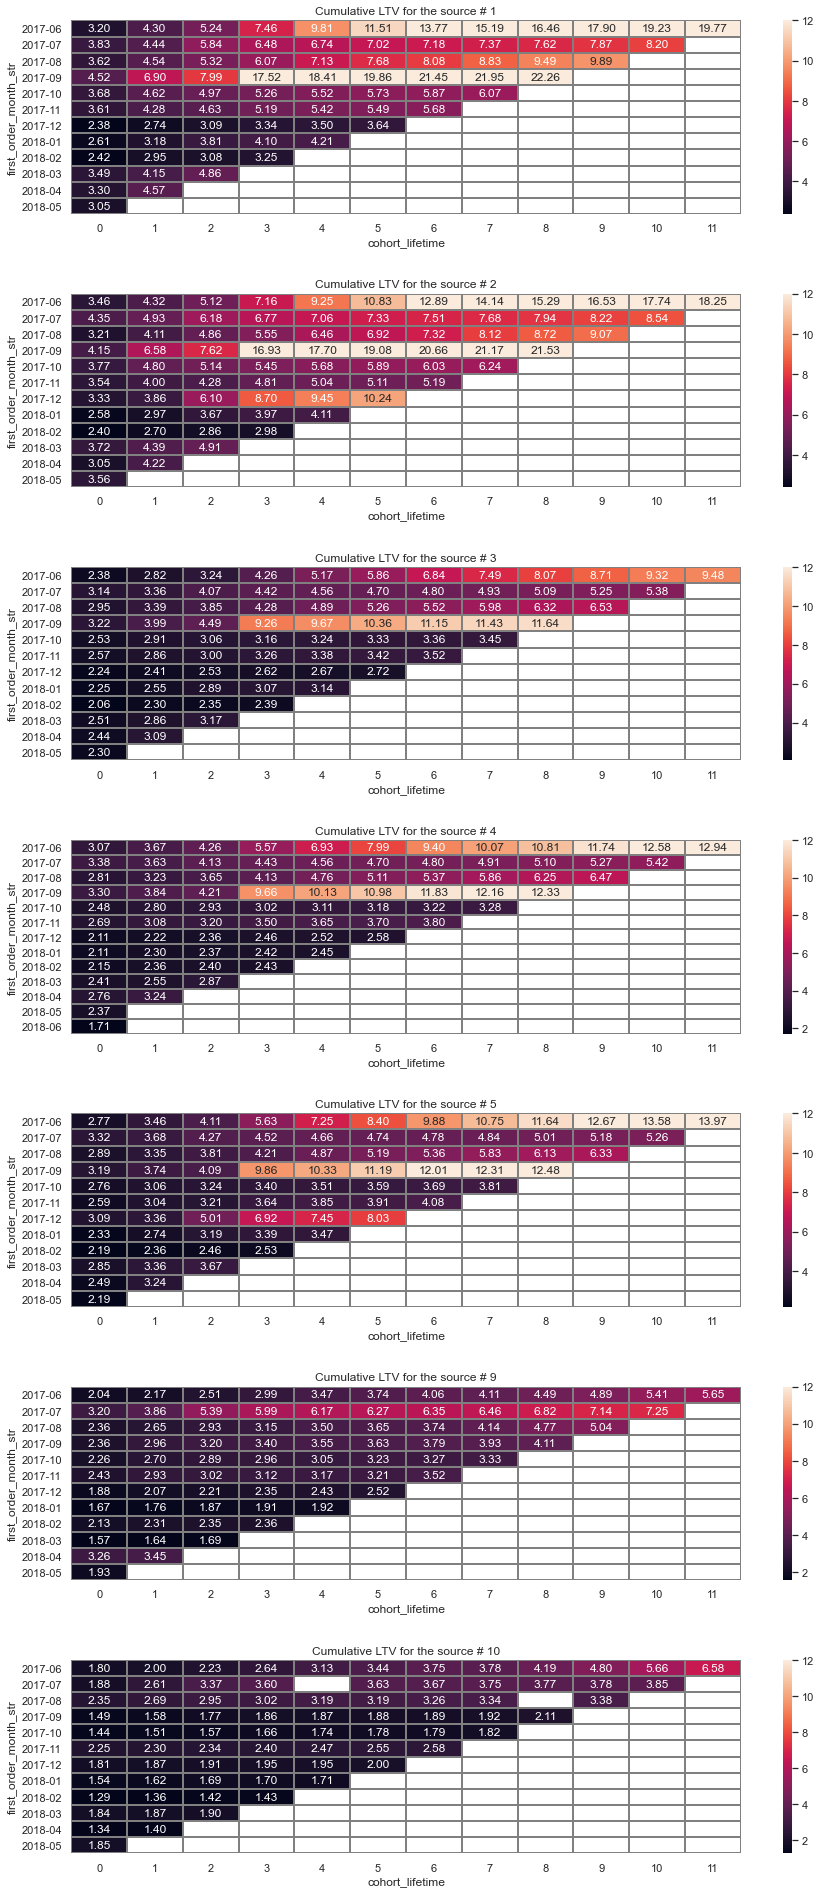

In [100]:
#cumulative ltv per source

fig = plt.figure(figsize=(15, 40))
plt.title("Cumulative LTV for different sources")
i=0
for source in sources:
    if source == 6 or source == 7:
        continue
    cum_source_output = report_per_source.query("source_id==@source").pivot_table(
    index='first_order_month_str', 
    columns='cohort_lifetime', 
    values='ltv', 
    aggfunc='mean').round(2)
    cum_ltv_pivot = cum_source_output.cumsum(axis=1).round(2)     
    ax1 = plt.subplot2grid((32, 12), (4*i, 0), colspan=12, rowspan=3)
    ax1.set_title("Cumulative LTV for the source # " + str(source), fontsize=12)    
    
    sns.heatmap(cum_ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', ax=ax1, vmax=12)
    i = i+1      
plt.show()

> **Conclusion:**
> <ul>
    <li>From the heatmap, it can be seen that september cohort bring more money compared to other cohorts </li>
    <li>Sources 1 is the best followed by source 2. All other sources are average except for 10 which performs worst</li> 
    

### Marketing

#### money spent overall/ per-source and over time

In [101]:
#money spent overall

overall_cost = costs['costs'].sum()
print(f'Overall Cost: {overall_cost}')

Overall Cost: 329131.62


In [102]:
#per-source

costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [103]:
#dataframe for costs per source

cost_per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


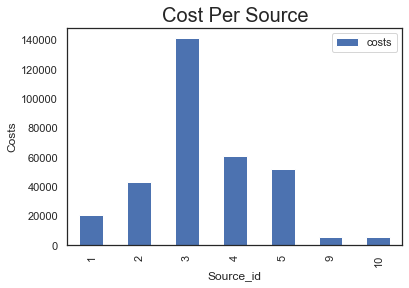

In [104]:
# bar plot for costs per source

cost_per_source.plot(x='source_id', y='costs',kind="bar")
plt.title('Cost Per Source', size =20)
plt.xlabel('Source_id')
plt.ylabel('Costs')
plt.show()

In [105]:
#costs over time

costs['month'] = costs['dt'].dt.month
costs['year'] = costs['dt'].dt.year

cost_overtime = costs.groupby(['year','month']).agg({'costs':'sum'})
cost_overtime

costs
year month          
2017 6      18015.00
     7      18240.59
     8      14790.54
     9      24368.91
     10     36322.88
     11     37907.88
     12     38315.35
2018 1      33518.52
     2      32723.03
     3      30415.27
     4      22289.38
     5      22224.27

In [106]:
#adding month column

costs['month'] = costs['dt'].to_numpy().astype('datetime64[M]')

costs.head(3)

,source_id,dt,costs,month,year
0,1,2017-06-01,75.20,2017-06-01,2017
1,1,2017-06-02,62.25,2017-06-01,2017
2,1,2017-06-03,36.53,2017-06-01,2017


In [107]:
#calculating total cost per month

cost_overtime_plot = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

Text(0, 0.5, 'Costs')

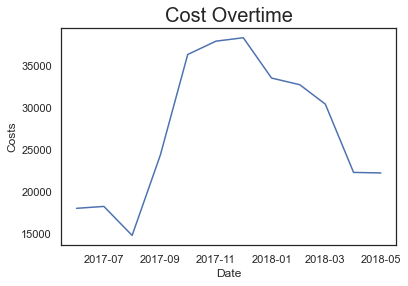

In [108]:
#plotting total cost over time 

plt.plot(cost_overtime_plot['month'],cost_overtime_plot['costs'])
plt.title('Cost Overtime', size =20)
plt.xlabel('Date')
plt.ylabel('Costs')

In [109]:
#cost per source over time 

cost_group = costs.groupby(['month', 'source_id'])['costs'].sum()
cost_group.head().to_frame()

costs
month      source_id         
2017-06-01 1          1125.61
           2          2427.38
           3          7731.65
           4          3514.80
           5          2616.12

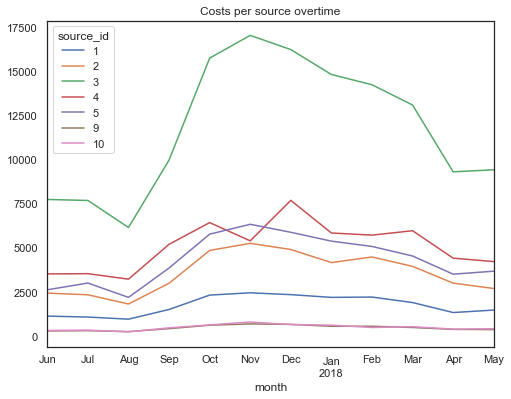

In [110]:
cost_group.unstack(level=1).plot(kind='line', figsize=(8,6), title='Costs per source overtime')
plt.show()

> **Conclusion:**
> <ul>
    <li>The total money spent amounted to 329131</li>
    <li>Majority of the share was spent on source_id 3. This could be because source_id was more effective compared to others. </li>
    <li>More money was spent in the month of dec (at the end of the year). This could be to attract more buyers who mostly buy during the year end because of special occasions</li>
    <li>More money was spent on sources 3,4 and 5 with 3 being the highest and the rest almost equally</li>

#### Customer Acquisition Cost

In [111]:
costs.head(3)

,source_id,dt,costs,month,year
0,1,2017-06-01,75.20,2017-06-01,2017
1,1,2017-06-02,62.25,2017-06-01,2017
2,1,2017-06-03,36.53,2017-06-01,2017


In [112]:
# calculating the costs per month

monthly_costs = costs[['month','costs']]
monthly_costs.head(3)


,month,costs
0,2017-06-01,75.20
1,2017-06-01,62.25
2,2017-06-01,36.53


In [113]:
#calculating cost per month

monthly_costs = monthly_costs.groupby('month').sum()
monthly_costs.head()

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [114]:
#merging tables

report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0,8.905091


Text(0, 0.5, 'CAC')

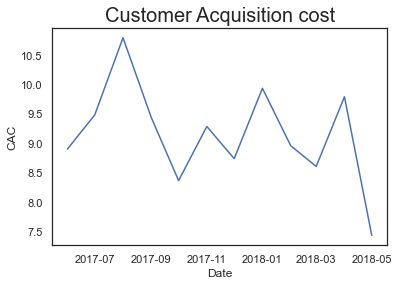

In [115]:
#customer acquisition cost over time

plt.plot(report_['first_order_month'],report_['cac'])
plt.title('Customer Acquisition cost', size =20)
plt.xlabel('Date')
plt.ylabel('CAC')

In [116]:
# number of users per source

users_per_source = visits.groupby('source_id')['uid'].nunique().reset_index()
users_per_source.columns = ['source_id','n_users']
users_per_source

,source_id,n_users
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [117]:
# calculate cac

cac = pd.merge(cost_per_source,users_per_source, on = 'source_id')
cac

,source_id,costs,n_users
0,1,20833.27,18999
1,2,42806.04,26245
2,3,141321.63,74756
3,4,61073.60,83525
4,5,51757.10,56974
5,9,5517.49,9264
6,10,5822.49,8067


In [118]:
# cac = costs/ number of users

cac['cac'] = cac['costs'] / cac['n_users']
cac.head(10)

,source_id,costs,n_users,cac
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766


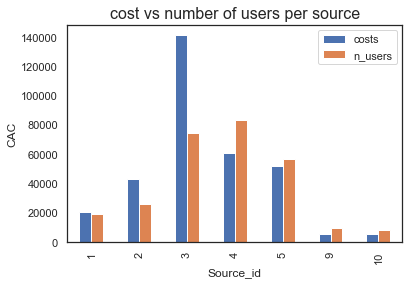

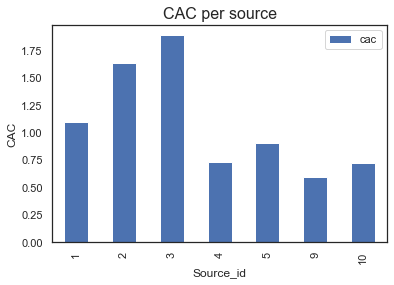

In [119]:
cac.plot(x='source_id', y=['costs','n_users'],kind="bar")
plt.title('cost vs number of users per source', size =16)
plt.xlabel('Source_id')
plt.ylabel('CAC')
plt.show()


cac.plot(x='source_id', y='cac',kind="bar")
plt.title('CAC per source', size =16)
plt.xlabel('Source_id')
plt.ylabel('CAC')
plt.show()

> **Conclusion:**
> <ul>
    <li>Customer acquisiton costs follows a pattern over time where it increases in a particular month and decareses for the next month. This could be a startegy to acquire new customer only when the old ones have drifted</li>
    <li>The CAC for the source id 3 is maximum, but the number of users on source_id 4 is greater than that of source_id 3. This could be a hint to spend more on source_id 4. The CAC is min for source_id 9 , so there must be more money spent on source_id 9  </li>
    

#### Return on Marketing Investment

In [120]:
report_.head(3)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091


In [121]:
#return on marketing investment

report_['romi'] = report_['ltv'] / report_['cac'] 
output2 = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output2.cumsum(axis=1).round(2).fillna(' ')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.4,0.4,0.41,0.42,0.43,0.43,0.44,
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,,
2017-09-01,0.30,0.36,0.39,0.6,0.62,0.65,0.69,0.7,0.71,,,
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,,,,
2017-11-01,0.28,0.3,0.31,0.33,0.34,0.34,0.34,,,,,
2017-12-01,0.27,0.29,0.34,0.4,0.42,0.44,,,,,,
2018-01-01,0.21,0.22,0.24,0.25,0.25,,,,,,,
2018-02-01,0.23,0.25,0.25,0.26,,,,,,,,


In [122]:
# ROMI per source

report_sources = pd.merge(report_per_source, cost_group, left_on=['first_order_month','source_id'], right_on=['month','source_id'])
report_sources['cac'] = report_sources['costs'] / report_sources['n_buyers']

report_sources['romi'] = report_sources['ltv'] / report_sources['cac']
report_sources.head(3)

,first_order_month,source_id,n_buyers,order_month,revenue,uid,cohort_lifetime,gp,ltv,first_order_month_str,costs,cac,romi
0,2017-06-01,1,401,2017-06-01,2563.84,401,0,1281.920,3.196808,2017-06,1125.61,2.807007,1.138867
1,2017-06-01,1,401,2017-07-01,881.60,37,1,440.800,1.099252,2017-06,1125.61,2.807007,0.391610
2,2017-06-01,1,401,2017-08-01,755.03,32,2,377.515,0.941434,2017-06,1125.61,2.807007,0.335387


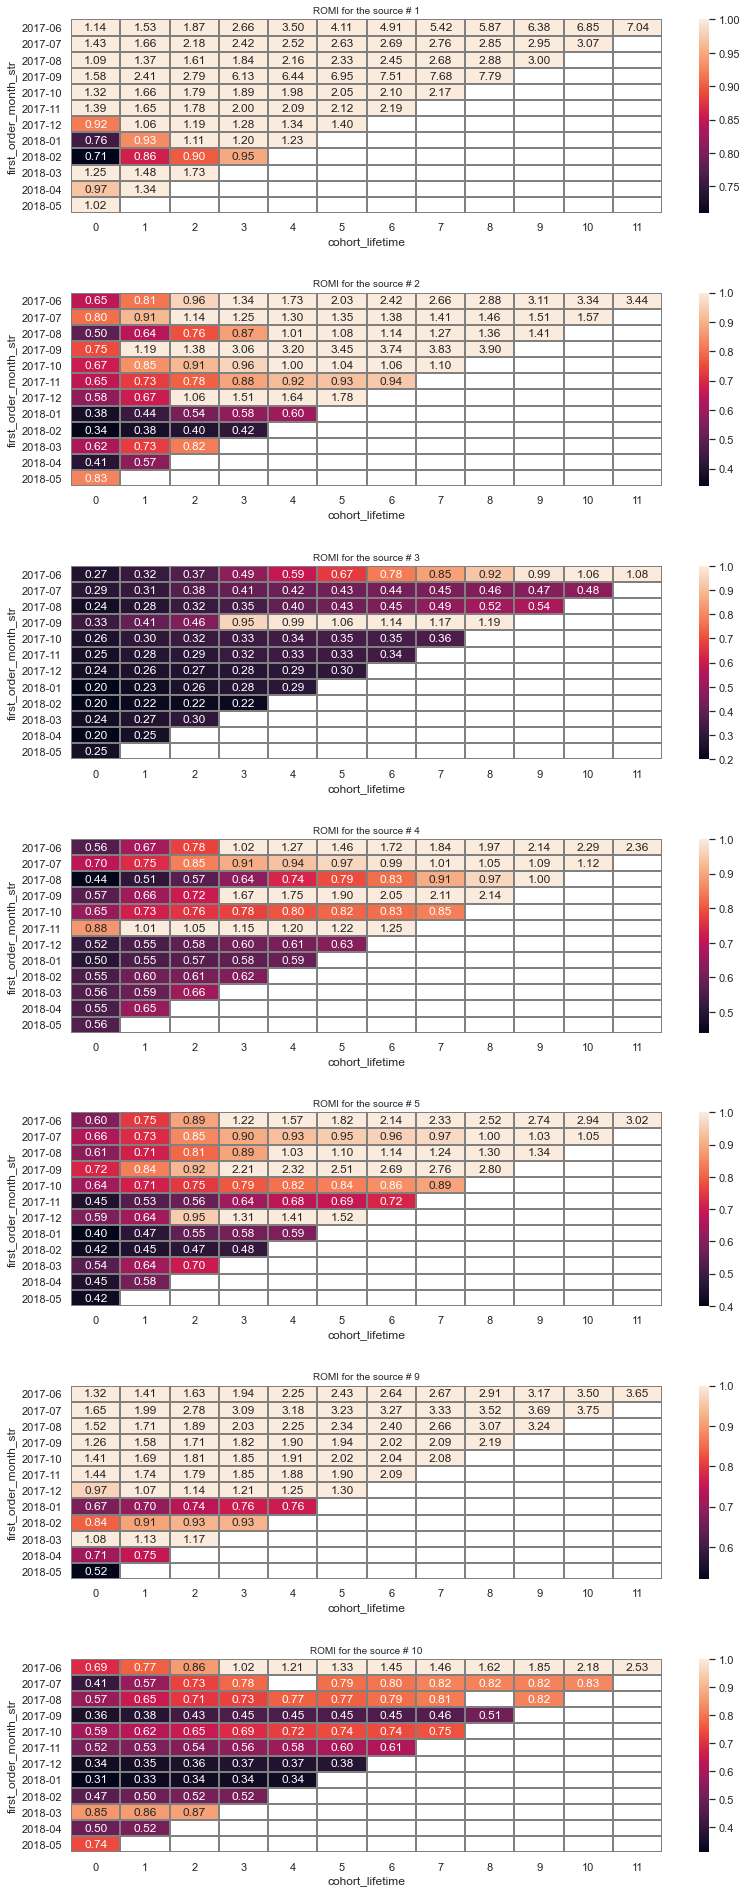

In [123]:
romi_source = report_sources.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi')

romi_source.cumsum(axis=1).round(3)


fig = plt.figure(figsize=(20, 40))
plt.title("ROMI for different sources")
i=0
# list to keep average ROMI for the sources
ROMI_sources=[]
for source in sources:
    if source == 6 or source == 7:
        continue
    output = report_sources.query("source_id==@source").pivot_table(
    index='first_order_month_str', 
    columns='cohort_lifetime', 
    values='romi', 
    aggfunc='mean').round(2)
    output = output.cumsum(axis=1).round(2)

    ROMI_sources.append(output.mean(axis=0))
    ax1 = plt.subplot2grid((32, 12), (4*i, 0), colspan=8, rowspan=3)
    ax1.set_title("ROMI for the source # " + str(source), fontsize=10)    
    
    sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', ax=ax1,vmax =1)
    i = i+1      
plt.show()

## Conclusion 

> **step 1:**
- Visits dataframe:  The device column had only two category, so it was changed form object type to category. Start_ts and end_ts were also changed to reduce the memory usage. 
- Orders dataframe: Buy_ts column datatype was changed from object to date time to reduce memory space
- Costs dataframe: dt column was changed from object to date time
- All the above operations were performed to optimise the memory usage by changing to appropriate datatypes

> **step 2:**
> <ol>
    <li><b>Product</b></li>
    <ul>
        <li>Number of visits per day, per month and per year was visualised and the average was calculated. There was a peak on a particular day in November , this could be due to some offers on special occasion. Weekly visits reveal that there is a drop in the number of visits after several weeks. This could be due to no new changes and a further increment may mean adding new features. Similar thing can be expected for monthly visits.</li>
        <li>Number of session per day was calculated. It was also compared against daily active users. Both follow a similar pattern which means that the users make almost 1 session per day. The number os session was also split based on devices. It was found that users prefer desktop over touch. This could be due to poor UI in touch. Improving the UI for small devices with proper lay outing may improve sessions per day as more users prefer using small devices over large ones</li>
    <li>The length of the session on an average was found to be about a minute. This could be becasue there wasn’t anything engaging on the website. This could be solved by adding some animations, referring to other similar products etc</li>
    <li>The retention rate for all the cohorts were declining except for the first cohort which increased and then dropped again. This could be because of poor UI, or the products were not available for the other cohorts or there were offers only for the first cohort. This could be  addressed by sending mails/  push notification about new products, giving offers etc.</li></ul>
    <br>
    <li><b>Sales</b></li>
    <ul>
        <li>Pie chart showing when people make purchase after their first visit was plotted. it was seen that about 70% of the users make purchases on the same day while the others within a week.</li>
        <li>The number of orders  were plotted. This revealed that maximum orders were placed starting from october to december. This could be because of special occasions such as halloween, christmas etc where the products are on discount and user make most the purchases</li>
        <li>The average purchase size was highest fro sept cohort but it further decreases during its lifetime.The LTV is maximum for sept-2017 cohort with a value  reaching about 6.72. The LTV for source 1 is highest followed by source 2. source 10 performs the worse, so investing in source 10 can be avoided</li></ul><br>
    <li><b>Marketing</b></li>
    <ul>
             <li>The overall money spent amounted to 329K USD. Major share of money was spent on source 3 with over 141K$</li>
            <li>More money was spent in dec-2017. There was a constant increase in money spent on source 3 followed by source 4.</li> 
        <li>Calculating the Customer acquisition cost, the least was for source 9 followed by source 4. so it is better to invest in these two sources more </li> 
        <li>ROMI per source was calculated and it was found that romi was much more through source 1, 2 and 9. Therefore it is recommended to concentrate on these sources. It is not recommended to invest in 3 as its romi is worse compared to all other sources. </li></ul>
  <br>


        
        




> **step 3: Final Recommendations**
> <ul>
    <li> In terms of devices, users prefer desktop over small devices. Small devices could also gain attention by customizing controls </li>
    <li> Focusing on ROMI, it is better to invest in sources 1, 2 and 9</li>
    <li>Increasing in ad campaigns at the end of the year might increase romi as users normally make more purchases then </li>
    <li>It is important to increase retention rate. This can be done by providing some special offers promtimg users to make more visits / purchases</li>
    